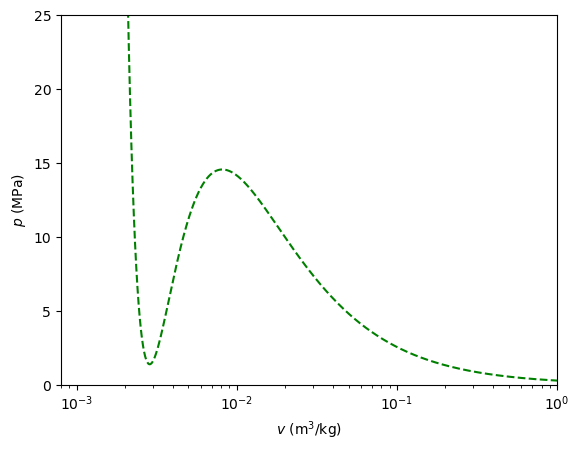

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.clf()
Tc_K = 647.096 
pc_Pa = 22.060e6

# percent of the critical temperature
F = 0.9

P = np.linspace(700/1e6, 22.063, 1000) # range of pressures

plt.xscale("log")

R_JperKgPerK = 461.5
a = 0.42748*((R_JperKgPerK**2)*(Tc_K**2.5))/pc_Pa
b = 0.08664*(R_JperKgPerK*Tc_K)/pc_Pa

T = F*Tc_K
v__ = np.linspace(0.002, 1, 50000)
p__ = ((R_JperKgPerK*T)/(v__ - b)) - a/((T**0.5)*v__*(v__ + b))

plt.plot(v__, p__/1e6, 'g--')

ax = plt.gca()
xmin = 0.8e-3
xmax = 1

ax.set_xlim([xmin, xmax])
ymin = 0
ymax = 25
ax.set_ylim([ymin, ymax])

ax.set_xlabel('$v$ (m$^3$/kg)')
ax.set_ylabel('$p$ (MPa)')

plt.savefig('redlich-kwong-p-v-diagram-subcritical.pdf')

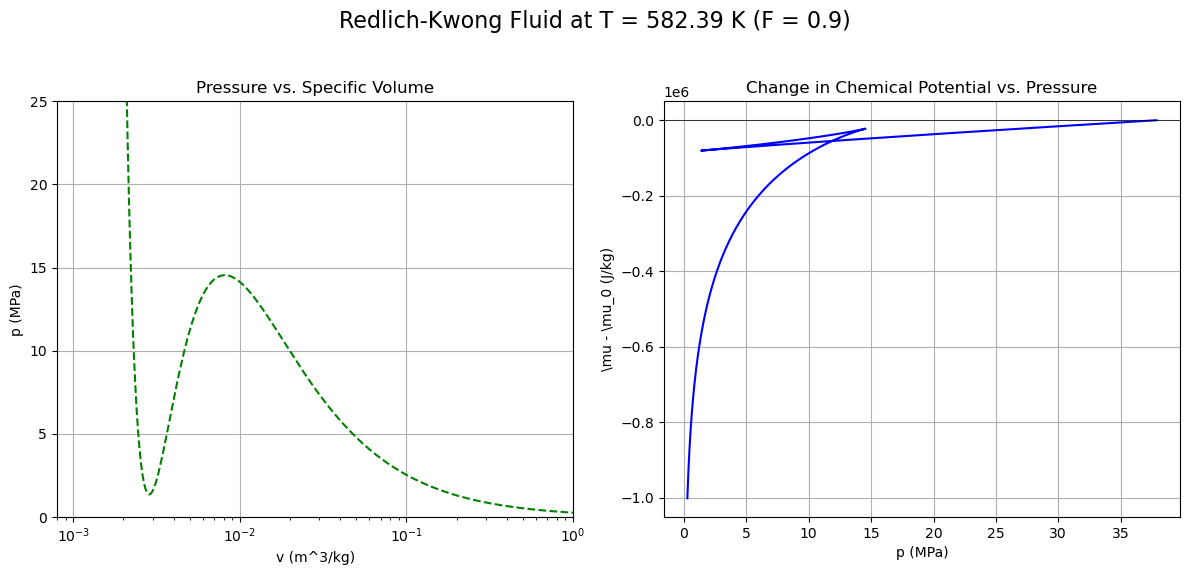

In [21]:
# This script calculates and plots the change in chemical potential as a function of
# pressure for a van der Waals fluid, based on the Gibbs-Duhem relation for an
# isothermal process ($$d \mu = v dp$$).

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------------------
# Inputs
# -------------------------------------------------------------------------------------
Tc_K = 647.096
pc_Pa = 22.060e6

# Temp as a fraction of the critical temp
F = 0.9

# -------------------------------------------------------------------------------------
# Initialization
# -------------------------------------------------------------------------------------
T = F * Tc_K

# van der Waals parameters for water-like substance
R_JperKgPerK = 461.5
a = 0.42748 * ((R_JperKgPerK**2) * (Tc_K**2.5)) / pc_Pa
b = 0.08664 * (R_JperKgPerK * Tc_K) / pc_Pa

# -------------------------------------------------------------------------------------
# Calculations, Redlich-Kwong model
# -------------------------------------------------------------------------------------
v__ = np.linspace(0.002, 1, 50000)
p__ = ((R_JperKgPerK * T) / (v__ - b)) - a / ((T**0.5) * v__ * (v__ + b))

# The Gibbs-Duhem relation for an isothermal process is:
# $$\Delta\mu = \mu - \mu_0 = \int_{p_0}^{p} v dp$$
# We can numerically approximate this integral using the trapezoidal rule.

# Calculate the differential of pressure
dp = np.diff(p__)

# Use the specific volume at the midpoint of each pressure step for the integration
v_mid = (v__[:-1] + v__[1:]) / 2

# Calculate the differential change in chemical potential for each step
d_mu = v_mid * dp

# Calculate the cumulative sum to get the total change in chemical potential
# from the starting point ($$\mu_0$$). The first point is 0, as it's the reference.
mu_change = np.cumsum(d_mu)
mu_change = np.insert(mu_change, 0, 0) # Add a zero for the initial point

# The pressure array for the chemical potential plot should be the same length
# as the mu_change array.
p_plot = p__
mu_change_plot = mu_change

# -------------------------------------------------------------------------------------
# Plots
# -------------------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f'Redlich-Kwong Fluid at T = {T:.2f} K (F = {F})', fontsize=16)

# Plot 1: Pressure vs. Specific Volume 
ax1.plot(v__, p__ / 1e6, 'g--')
ax1.set_xlim([0.8e-3, 1])
ax1.set_ylim([0, 25])
ax1.set_xlabel('v (m^3/kg)')
ax1.set_ylabel('p (MPa)')
ax1.set_title('Pressure vs. Specific Volume')
ax1.grid(True)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.set_xscale('log')

# Plot 2: Change in Chemical Potential vs. Pressure
# Note: The pressure is plotted on the x-axis, and chemical potential on the y-axis.
ax2.plot(p_plot / 1e6, mu_change_plot, 'b-')
ax2.set_xlabel('p (MPa)')
ax2.set_ylabel('\mu - \mu_0 (J/kg)')
ax2.set_title('Change in Chemical Potential vs. Pressure')
ax2.grid(True)
ax2.axhline(y=0, color='k', linewidth=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('redlich-kwong-p-v_mu-p-diagram-subcritical.pdf')

plt.show()


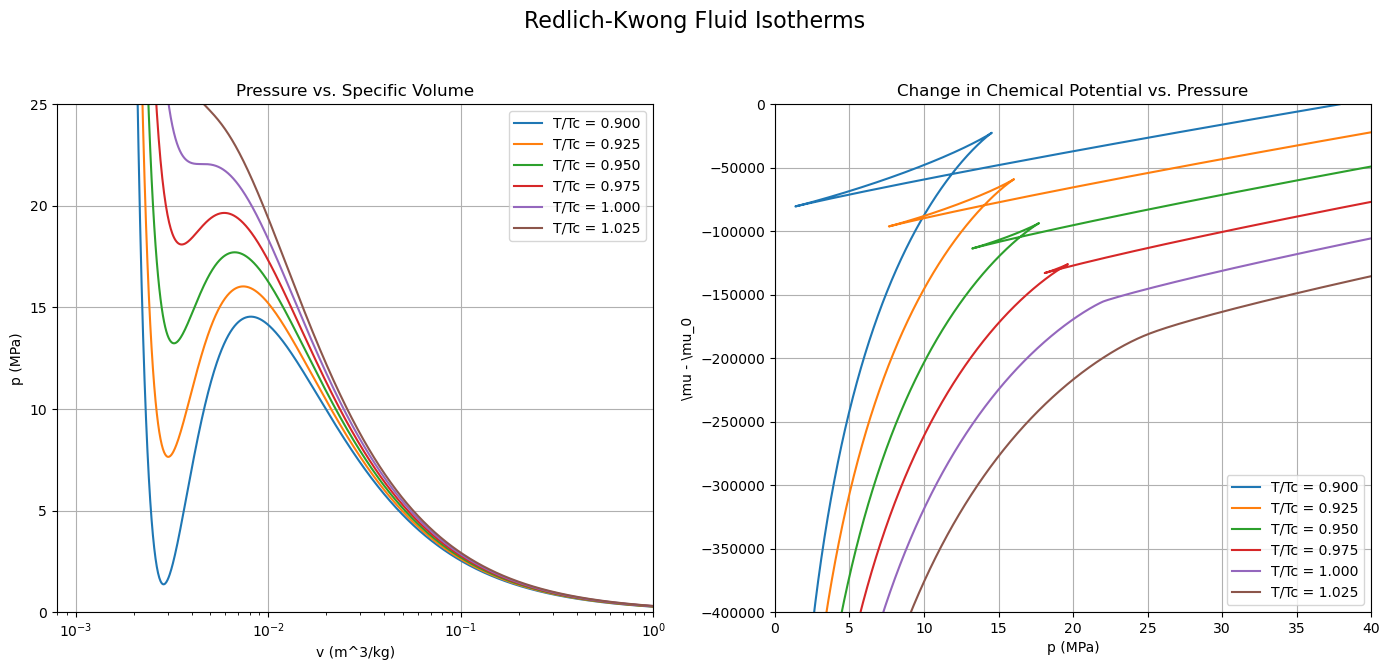

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Tc_K = 647.096
pc_Pa = 22.060e6

R_JperKgPerK = 461.5
a = 0.42748 * ((R_JperKgPerK**2) * (Tc_K**2.5)) / pc_Pa
b = 0.08664 * (R_JperKgPerK * Tc_K) / pc_Pa

# We will use several fractions of the critical temperature (F)
# to plot isotherms both below and above the critical temperature.
# F = 1.0 is the critical isotherm.
F_values = [0.9, 0.925, .95, 0.975, 1.0, 1.025]

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Redlich-Kwong Fluid Isotherms', fontsize=16)

for F in F_values:
    T = F * Tc_K

    # Calculate Pressure-Volume Curve, Redlich-Kwong model
    v__ = np.linspace(0.002, 1, 50000)
    p__ = ((R_JperKgPerK * T) / (v__ - b)) - a / ((T**0.5) * v__ * (v__ + b))

    # Calculate Change in Chemical Potential using numerical integration
    dp = np.diff(p__)
    v_mid = (v__[:-1] + v__[1:]) / 2
    d_mu = v_mid * dp
    mu_change = np.cumsum(d_mu)
    mu_change = np.insert(mu_change, 0, 0)

    # Plot on the first axes (Pressure vs. Specific Volume)
    label = f'T/Tc = {F:.3f}'
    ax1.plot(v__, p__ / 1e6, label=label)

    # Plot on the second axes (Change in Chemical Potential vs. Pressure)
    p_plot = p__
    mu_change_plot = mu_change
    ax2.plot(p_plot / 1e6, mu_change_plot, label=label)

# Plot 1: Pressure vs. Specific Volume
ax1.set_xlim([0.8e-3, 1])
ax1.set_ylim([0, 25])
ax1.set_xlabel('v (m^3/kg)')
ax1.set_ylabel('p (MPa)')
ax1.set_title('Pressure vs. Specific Volume')
ax1.grid(True)
ax1.axhline(y=0, color='k', linewidth=0.5)
# ax1.legend(handlelength=4, handletextpad=1.5, borderpad=0.8) 
ax1.legend()
ax1.set_xscale('log')

# Plot 2: Change in Chemical Potential vs. Pressure
ax2.set_xlabel('p (MPa)')
ax2.set_ylabel('\mu - \mu_0')
ax2.set_title('Change in Chemical Potential vs. Pressure')
ax2.grid(True)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.legend()
ax2.set_xlim([0, 40])
ax2.set_ylim([-0.4e6, 0.0e6])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('redlich-kwong-p-v_mu-p_multiple-T-diagram-subcritical.pdf')

plt.show()


For T/Tc = 0.900:
  Equilibrium Pressure: 11.8657 MPa
  Specific Volume (liquid): 0.0023 m^3/kg
  Specific Volume (gas): 0.0151 m^3/kg
  Minimum Chemical Potential Difference: 7.28e-12 J/kg

For T/Tc = 0.925:
  Equilibrium Pressure: 14.0334 MPa
  Specific Volume (liquid): 0.0024 m^3/kg
  Specific Volume (gas): 0.0122 m^3/kg
  Minimum Chemical Potential Difference: 1.46e-11 J/kg

For T/Tc = 0.950:
  Equilibrium Pressure: 16.4478 MPa
  Specific Volume (liquid): 0.0027 m^3/kg
  Specific Volume (gas): 0.0097 m^3/kg
  Minimum Chemical Potential Difference: 1.46e-11 J/kg

For T/Tc = 0.975:
  Equilibrium Pressure: 19.1198 MPa
  Specific Volume (liquid): 0.0031 m^3/kg
  Specific Volume (gas): 0.0075 m^3/kg
  Minimum Chemical Potential Difference: 0.00e+00 J/kg



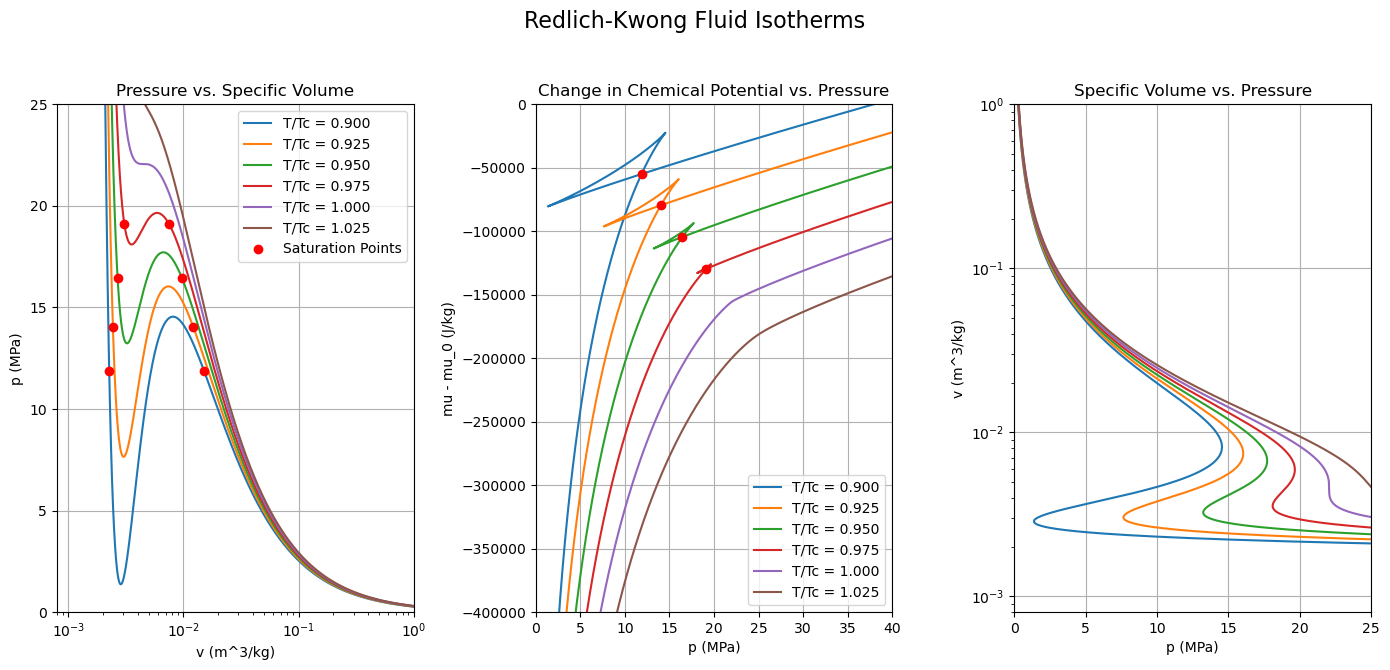

In [23]:
# This script calculates and plots the change in chemical potential as a function of
# pressure for a van der Waals fluid, based on the Gibbs-Duhem relation for an
# isothermal process (dµ = v dp).
# It then uses a numerical search to find the points of phase equilibrium
# where the chemical potentials of the liquid and gas phases are equal.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# --- 1. Define Constants and Parameters ---
Tc_K = 647.096
pc_Pa = 22.060e6

# Van der Waals parameters for water-like substance
R_JperKgPerK = 461.5
a = 0.42748 * ((R_JperKgPerK**2) * (Tc_K**2.5)) / pc_Pa
b = 0.08664 * (R_JperKgPerK * Tc_K) / pc_Pa

# --- 2. Define Isotherms to Plot ---
# We will use several fractions of the critical temperature (F)
# to plot isotherms both below and above the critical temperature.
F_values = [0.9, 0.925, 0.95, 0.975, 1.0, 1.025]

# number of specific volume data points
v_max = 100000

# Set up the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7))
fig.suptitle('Redlich-Kwong Fluid Isotherms', fontsize=16)

# Lists to store saturation points for plotting
p_saturation = []
v_liquid_sat = []
v_gas_sat = []
mu_saturation = []

# --- 3. Loop through Isotherms and Plot ---
for F in F_values:
    T = F * Tc_K

    # Calculate Pressure-Volume Curve
    v__ = np.linspace(0.002, 1, v_max)
    p__ = ((R_JperKgPerK * T) / (v__ - b)) - a / ((T**0.5) * v__ * (v__ + b))

    # Calculate Change in Chemical Potential using numerical integration
    dp = np.diff(p__)
    v_mid = (v__[:-1] + v__[1:]) / 2
    d_mu = v_mid * dp
    mu_change = np.cumsum(d_mu)
    mu_change = np.insert(mu_change, 0, 0)

    # --- 4. Find Equilibrium Points using Gibbs Criterion ---
    if F < 1.0:
        # Find the indices of the local maximum and minimum of the pressure-volume curve.
        p_diff = np.diff(p__)
        p_sign_change = np.where(np.diff(np.sign(p_diff)))[0]

        if len(p_sign_change) >= 2:
            unstable_start_idx = p_sign_change[0]
            unstable_end_idx = p_sign_change[1]

            # Define the liquid and vapor branches of the curve
            p_liquid_branch = p__[:unstable_start_idx + 1]
            mu_liquid_branch = mu_change[:unstable_start_idx + 1]

            p_vapor_branch = p__[unstable_end_idx:]
            mu_vapor_branch = mu_change[unstable_end_idx:]

            # Create interpolation functions for each branch
            mu_liquid_func = interp1d(p_liquid_branch, mu_liquid_branch)
            mu_vapor_func = interp1d(p_vapor_branch, mu_vapor_branch)

            # Define a function whose root we want to find
            def mu_diff_func(p):
                return mu_liquid_func(p) - mu_vapor_func(p)

            # Find the equilibrium pressure using a root-finding method
            # We need to find the range where the two branches overlap
            p_min_overlap = max(p_liquid_branch.min(), p_vapor_branch.min())
            p_max_overlap = min(p_liquid_branch.max(), p_vapor_branch.max())

            if p_min_overlap < p_max_overlap:
                try:
                    p_eq = brentq(mu_diff_func, p_min_overlap, p_max_overlap)
                    
                    # Find corresponding specific volumes and chemical potential
                    liquid_idx = np.argmin(np.abs(p_liquid_branch - p_eq))
                    vapor_idx = np.argmin(np.abs(p_vapor_branch - p_eq)) + unstable_end_idx

                    v_liquid = v__[liquid_idx]
                    v_gas = v__[vapor_idx]
                    mu_eq = mu_liquid_func(p_eq)

                    # Append the calculated saturation points to the lists
                    p_saturation.append(p_eq / 1e6)
                    v_liquid_sat.append(v_liquid)
                    v_gas_sat.append(v_gas)
                    mu_saturation.append(mu_eq)

                    print(f"For T/Tc = {F:.3f}:")
                    print(f"  Equilibrium Pressure: {p_eq/1e6:.4f} MPa")
                    print(f"  Specific Volume (liquid): {v_liquid:.4f} m^3/kg")
                    print(f"  Specific Volume (gas): {v_gas:.4f} m^3/kg")
                    print(f"  Minimum Chemical Potential Difference: {np.abs(mu_liquid_func(p_eq) - mu_vapor_func(p_eq)):.2e} J/kg\n")
                except ValueError:
                    print(f"Could not find equilibrium for T/Tc = {F:.3f}. The pressures may not have a zero-crossing.\n")

    # Plot on the first axes (Pressure vs. Specific Volume)
    label = f'T/Tc = {F:.3f}'
    ax1.plot(v__, p__ / 1e6, label=label)

    # Plot on the second axes (Change in Chemical Potential vs. Pressure)
    p_plot = p__
    mu_change_plot = mu_change
    ax2.plot(p_plot / 1e6, mu_change_plot, label=label)

    # Plot on the first axes (Specific Volume vs. Pressure)
    label = f'T/Tc = {F:.3f}'
    ax3.plot(p__ / 1e6, v__, label=label)

# --- 5. Finalize Plots ---

# Plot 1: Pressure vs. Specific Volume
ax1.set_xlim([0.8e-3, 1])
ax1.set_ylim([0, 25])
ax1.set_xlabel('v (m^3/kg)')
ax1.set_ylabel('p (MPa)')
ax1.set_title('Pressure vs. Specific Volume')
ax1.grid(True)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.set_xscale('log')

# Plot the saturation curve
ax1.plot(v_liquid_sat, p_saturation, 'ro', label='Saturation Points')
ax1.plot(v_gas_sat, p_saturation, 'ro')
ax1.legend()

# Plot 2: Change in Chemical Potential vs. Pressure
ax2.set_xlabel('p (MPa)')
ax2.set_ylabel('mu - mu_0 (J/kg)')
ax2.set_title('Change in Chemical Potential vs. Pressure')
ax2.grid(True)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.legend()
ax2.set_xlim([0, 40])
ax2.set_ylim([-0.4e6, 0.0e6])

# Plot the saturation points on the chemical potential plot
ax2.plot(p_saturation, mu_saturation, 'ro')

# Plot 3: 
ax3.set_ylim([0.8e-3, 1])
ax3.set_xlim([0, 25])
ax3.set_ylabel('v (m^3/kg)')
ax3.set_xlabel('p (MPa)')
ax3.set_title('Specific Volume vs. Pressure')
ax3.grid(True)
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.set_yscale('log')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('redlich-kwong-p-v_mu-p_v-p_multiple-T-diagram-subcritical.pdf')
plt.show()


In [6]:
!pip install pyCalor
from pyCalor import thermo as th

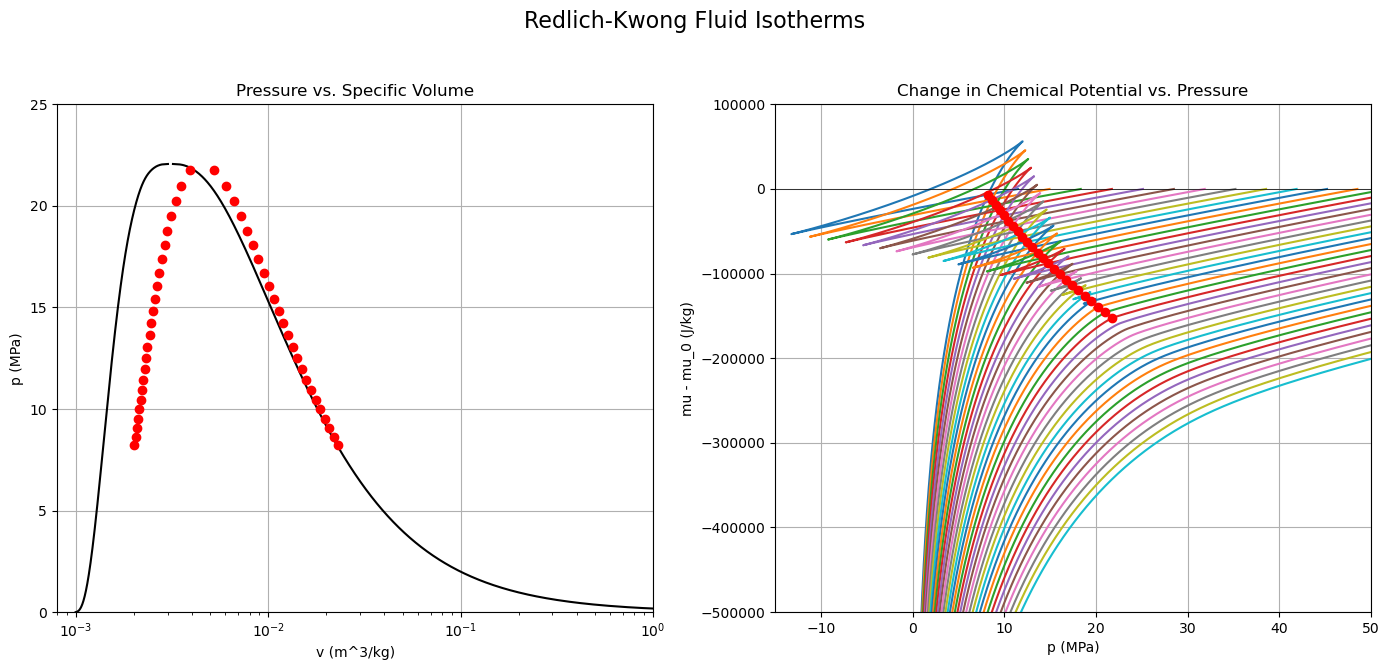

In [25]:
# This script calculates and plots the change in chemical potential as a function of
# pressure for a van der Waals fluid, based on the Gibbs-Duhem relation for an
# isothermal process (dµ = v dp).
# It then uses a numerical search to find the points of phase equilibrium
# where the chemical potentials of the liquid and gas phases are equal.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# --- 1. Define Constants and Parameters ---
Tc_K = 647.096
pc_Pa = 22.060e6

# Van der Waals parameters for water-like substance
R_JperKgPerK = 461.5
a = 0.42748 * ((R_JperKgPerK**2) * (Tc_K**2.5)) / pc_Pa
b = 0.08664 * (R_JperKgPerK * Tc_K) / pc_Pa

# --- 2. Define Isotherms to Plot ---
# We will use several fractions of the critical temperature (F)
# to plot isotherms both below and above the critical temperature.
# F_values = [0.9, 0.925, 0.95, 0.975, 1.0, 1.025]
# F_values = np.linspace(0.87, 1.1, 20)
# F_values = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.985,0.99,0.995,0.996,0.997,0.998,0.999,1.0,1.05,1.1,1.15,1.2]
F_values = np.linspace(0.85,1.1,40)


# number of specific volume data points
v_max = 50000

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Redlich-Kwong Fluid Isotherms', fontsize=16)

# Lists to store saturation points for plotting
p_saturation = []
v_liquid_sat = []
v_gas_sat = []
mu_saturation = []

# --- 3. Loop through Isotherms and Plot ---
for F in F_values:
    T = F * Tc_K

    # Calculate Pressure-Volume Curve
    v__ = np.linspace(0.002, 1, v_max)
    p__ = ((R_JperKgPerK * T) / (v__ - b)) - a / ((T**0.5) * v__ * (v__ + b))

    # Calculate Change in Chemical Potential using numerical integration
    dp = np.diff(p__)
    v_mid = (v__[:-1] + v__[1:]) / 2
    d_mu = v_mid * dp
    mu_change = np.cumsum(d_mu)
    mu_change = np.insert(mu_change, 0, 0)

    # --- 4. Find Equilibrium Points using Gibbs Criterion ---
    if F < 1.0:
        # Find the indices of the local maximum and minimum of the pressure-volume curve.
        p_diff = np.diff(p__)
        p_sign_change = np.where(np.diff(np.sign(p_diff)))[0]

        if len(p_sign_change) >= 2:
            unstable_start_idx = p_sign_change[0]
            unstable_end_idx = p_sign_change[1]

            # Define the liquid and vapor branches of the curve
            p_liquid_branch = p__[:unstable_start_idx + 1]
            mu_liquid_branch = mu_change[:unstable_start_idx + 1]

            p_vapor_branch = p__[unstable_end_idx:]
            mu_vapor_branch = mu_change[unstable_end_idx:]

            # Create interpolation functions for each branch
            mu_liquid_func = interp1d(p_liquid_branch, mu_liquid_branch)
            mu_vapor_func = interp1d(p_vapor_branch, mu_vapor_branch)

            # Define a function whose root we want to find
            def mu_diff_func(p):
                return mu_liquid_func(p) - mu_vapor_func(p)

            # Find the equilibrium pressure using a root-finding method
            # We need to find the range where the two branches overlap
            p_min_overlap = max(p_liquid_branch.min(), p_vapor_branch.min())
            p_max_overlap = min(p_liquid_branch.max(), p_vapor_branch.max())

            if p_min_overlap < p_max_overlap:
                try:
                    p_eq = brentq(mu_diff_func, p_min_overlap, p_max_overlap)
                    
                    # Find corresponding specific volumes and chemical potential
                    liquid_idx = np.argmin(np.abs(p_liquid_branch - p_eq))
                    vapor_idx = np.argmin(np.abs(p_vapor_branch - p_eq)) + unstable_end_idx

                    v_liquid = v__[liquid_idx]
                    v_gas = v__[vapor_idx]
                    mu_eq = mu_liquid_func(p_eq)

                    # Append the calculated saturation points to the lists
                    p_saturation.append(p_eq / 1e6)
                    v_liquid_sat.append(v_liquid)
                    v_gas_sat.append(v_gas)
                    mu_saturation.append(mu_eq)

#                    print(f"For T/Tc = {F:.3f}:")
#                    print(f"  Equilibrium Pressure: {p_eq/1e6:.4f} MPa")
#                    print(f"  Specific Volume (liquid): {v_liquid:.4f} m^3/kg")
#                    print(f"  Specific Volume (gas): {v_gas:.4f} m^3/kg")
#                    print(f"  Minimum Chemical Potential Difference: {np.abs(mu_liquid_func(p_eq) - mu_vapor_func(p_eq)):.2e} J/kg\n")
                except ValueError:
                    print(f"Could not find equilibrium for T/Tc = {F:.3f}. The pressures may not have a zero-crossing.\n")

    # Plot on the first axes (Pressure vs. Specific Volume)
    label = f'T/Tc = {F:.3f}'
    #ax1.plot(v__, p__ / 1e6, label=label)

    # Plot on the second axes (Change in Chemical Potential vs. Pressure)
    p_plot = p__
    mu_change_plot = mu_change
    ax2.plot(p_plot / 1e6, mu_change_plot, label=label)


# saturation lines of real water...

P = np.linspace(700/1e6, 22.063, 1000) # range of pressures
vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

ax1.plot(vvap, P, 'k-')
ax1.plot(vliq, P, 'k-')


# --- 5. Finalize Plots ---

# Plot 1: Pressure vs. Specific Volume
ax1.set_xlim([0.8e-3, 1])
ax1.set_ylim([0, 25])
ax1.set_xlabel('v (m^3/kg)')
ax1.set_ylabel('p (MPa)')
ax1.set_title('Pressure vs. Specific Volume')
ax1.grid(True)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.set_xscale('log')

# Plot the saturation curve
ax1.plot(v_liquid_sat, p_saturation, 'ro', label='Saturation Points')
ax1.plot(v_gas_sat, p_saturation, 'ro')
# ax1.legend()

# Plot 2: Change in Chemical Potential vs. Pressure
ax2.set_xlabel('p (MPa)')
ax2.set_ylabel('mu - mu_0 (J/kg)')
ax2.set_title('Change in Chemical Potential vs. Pressure')
ax2.grid(True)
ax2.axhline(y=0, color='k', linewidth=0.5)
# ax2.legend()
ax2.set_xlim([-15, 50])
ax2.set_ylim([-0.5e6, 0.1e6])

# Plot the saturation points on the chemical potential plot
ax2.plot(p_saturation, mu_saturation, 'ro')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('redlich-kwong-p-v_mu-p_multiple-T_saturation-diagram-subcritical.pdf')

plt.show()


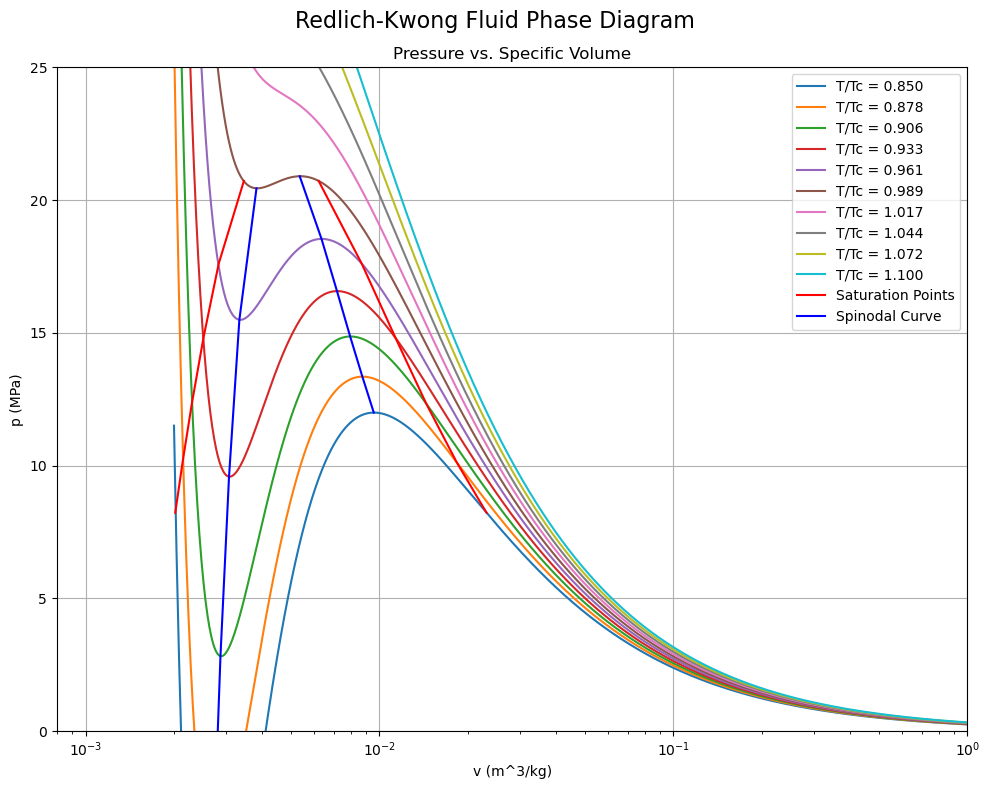

In [36]:
# This script calculates and plots the van der Waals isotherms,
# the spinodal curve (limits of stability), and the saturation curve (liquid-vapor equilibrium)
# on a single pressure-volume diagram.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# --- 1. Define Constants and Parameters ---
Tc_K = 647.096
pc_Pa = 22.060e6

# Van der Waals parameters for a water-like substance
R_JperKgPerK = 461.5
a = 0.42748 * ((R_JperKgPerK**2) * (Tc_K**2.5)) / pc_Pa
b = 0.08664 * (R_JperKgPerK * Tc_K) / pc_Pa

# --- 2. Define Isotherms to Plot ---
# We will use several fractions of the critical temperature (F)
# to plot isotherms both below and above the critical temperature.
F_values = np.linspace(0.85,1.1,10)#[0.9, 0.925, 0.95, 0.975, 1.0, 1.025]

# number of specific volume data points
v_max = 50000

# Set up the figure and subplot
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Redlich-Kwong Fluid Phase Diagram', fontsize=16)

# Lists to store saturation and spinodal points for plotting
p_saturation = []
v_liquid_sat = []
v_gas_sat = []
p_spinodal_liquid = []
p_spinodal_vapor = []
v_spinodal_liquid = []
v_spinodal_vapor = []

# --- 3. Loop through Isotherms and Plot ---
for F in F_values:
    T = F * Tc_K

    # Calculate Pressure-Volume Curve
    v__ = np.linspace(0.002, 1, v_max)
    p__ = ((R_JperKgPerK * T) / (v__ - b)) - a / ((T**0.5) * v__ * (v__ + b))

    # Plot on the axes (Pressure vs. Specific Volume)
    label = f'T/Tc = {F:.3f}'
    ax.plot(v__, p__ / 1e6, label=label)

    if F < 1.0:
        # --- 4. Find Saturation Points (Phase Equilibrium) ---
        # The saturation points are where the chemical potentials of the
        # liquid and vapor phases are equal. This is a robust numerical approach.
        dp = np.diff(p__)
        v_mid = (v__[:-1] + v__[1:]) / 2
        mu_change = np.cumsum(v_mid * dp)
        mu_change = np.insert(mu_change, 0, 0)

        # Find the indices of the local maximum and minimum of the pressure-volume curve.
        p_diff = np.diff(p__)
        p_sign_change = np.where(np.diff(np.sign(p_diff)))[0]

        if len(p_sign_change) >= 2:
            unstable_start_idx = p_sign_change[0]
            unstable_end_idx = p_sign_change[1]

            p_liquid_branch = p__[:unstable_start_idx + 1]
            mu_liquid_branch = mu_change[:unstable_start_idx + 1]
            p_vapor_branch = p__[unstable_end_idx:]
            mu_vapor_branch = mu_change[unstable_end_idx:]

            mu_liquid_func = interp1d(p_liquid_branch, mu_liquid_branch)
            mu_vapor_func = interp1d(p_vapor_branch, mu_vapor_branch)

            def mu_diff_func(p):
                return mu_liquid_func(p) - mu_vapor_func(p)

            p_min_overlap = max(p_liquid_branch.min(), p_vapor_branch.min())
            p_max_overlap = min(p_liquid_branch.max(), p_vapor_branch.max())

            if p_min_overlap < p_max_overlap:
                try:
                    p_eq = brentq(mu_diff_func, p_min_overlap, p_max_overlap)

                    liquid_idx = np.argmin(np.abs(p_liquid_branch - p_eq))
                    vapor_idx = np.argmin(np.abs(p_vapor_branch - p_eq)) + unstable_end_idx

                    v_liquid = v__[liquid_idx]
                    v_gas = v__[vapor_idx]

                    p_saturation.append(p_eq / 1e6)
                    v_liquid_sat.append(v_liquid)
                    v_gas_sat.append(v_gas)

                except ValueError:
                    pass

        # --- 5. Find Spinodal Points ---
        # The spinodal points are where dp/dv = 0, marking the local max and min pressures.
        if len(p_sign_change) >= 2:
            spinodal_liquid_idx = p_sign_change[0]
            v_liquid_spinodal = v__[spinodal_liquid_idx]
            p_liquid_spinodal = p__[spinodal_liquid_idx]

            spinodal_vapor_idx = p_sign_change[1]
            v_vapor_spinodal = v__[spinodal_vapor_idx]
            p_vapor_spinodal = p__[spinodal_vapor_idx]

            p_spinodal_liquid.append(p_liquid_spinodal / 1e6)
            p_spinodal_vapor.append(p_vapor_spinodal / 1e6)
            v_spinodal_liquid.append(v_liquid_spinodal)
            v_spinodal_vapor.append(v_vapor_spinodal)

#P = np.linspace(700/1e6, 22.063, 1000) # range of pressures
#vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
#vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

#ax.plot(vvap, P, 'k--')
#ax.plot(vliq, P, 'k--')


# --- 6. Finalize Plot ---
# Plot the saturation curve
ax.plot(v_liquid_sat, p_saturation, 'r-', label='Saturation Points')
ax.plot(v_gas_sat, p_saturation, 'r-')

# Plot the spinodal curve
ax.plot(v_spinodal_liquid, p_spinodal_liquid, 'b-', label='Spinodal Curve')
ax.plot(v_spinodal_vapor, p_spinodal_vapor, 'b-')

ax.set_xlim([0.8e-3, 1])
ax.set_ylim([0, 25])
ax.set_xlabel('v (m^3/kg)')
ax.set_ylabel('p (MPa)')
ax.set_title('Pressure vs. Specific Volume')
ax.grid(True)
ax.set_xscale('log')
ax.legend()

plt.tight_layout()

plt.savefig('redlich-kwong-p-v_multiple-T_spinodal-diagram-subcritical.pdf')

plt.show()


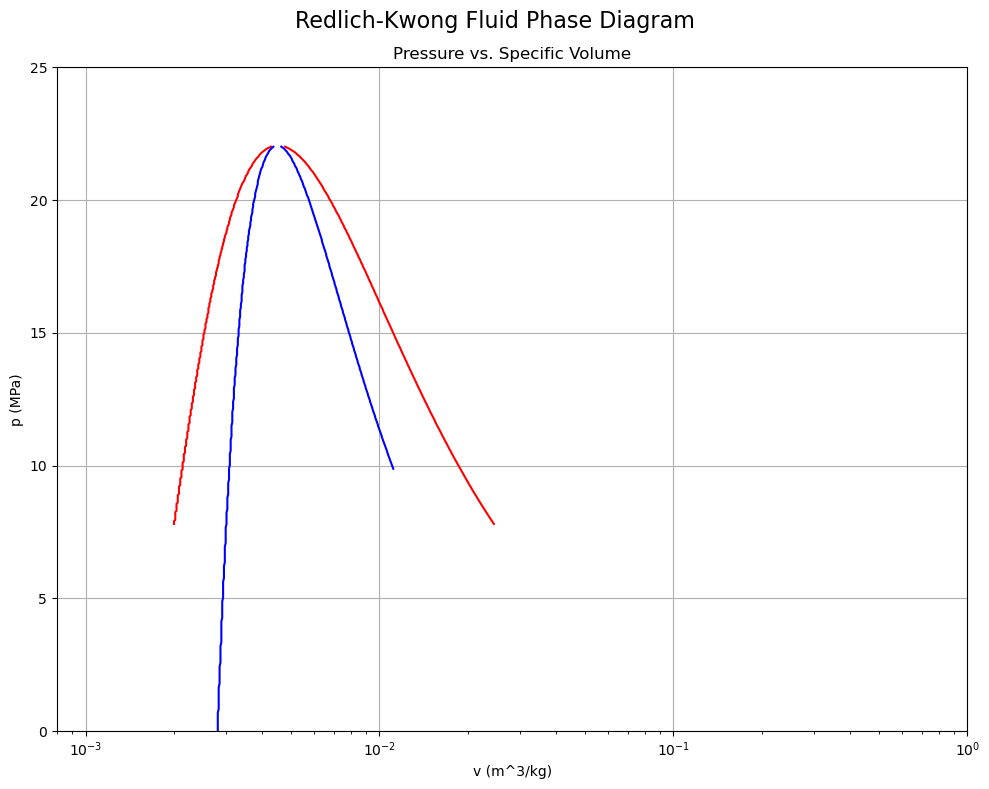

In [43]:
# This script calculates and plots the van der Waals isotherms,
# the spinodal curve (limits of stability), and the saturation curve (liquid-vapor equilibrium)
# on a single pressure-volume diagram.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# --- 1. Define Constants and Parameters ---
Tc_K = 647.096
pc_Pa = 22.060e6

# Van der Waals parameters for a water-like substance
R_JperKgPerK = 461.5
a = 0.42748 * ((R_JperKgPerK**2) * (Tc_K**2.5)) / pc_Pa
b = 0.08664 * (R_JperKgPerK * Tc_K) / pc_Pa

# --- 2. Define Isotherms to Plot ---
# We will use several fractions of the critical temperature (F)
# to plot isotherms both below and above the critical temperature.
F_values = np.linspace(0.8,1.1,500)#[0.9, 0.925, 0.95, 0.975, 1.0, 1.025]

# number of specific volume data points
v_max = 50000

# Set up the figure and subplot
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Redlich-Kwong Fluid Phase Diagram', fontsize=16)

# Lists to store saturation and spinodal points for plotting
p_saturation = []
v_liquid_sat = []
v_gas_sat = []
p_spinodal_liquid = []
p_spinodal_vapor = []
v_spinodal_liquid = []
v_spinodal_vapor = []

# --- 3. Loop through Isotherms and Plot ---
for F in F_values:
    T = F * Tc_K

    # Calculate Pressure-Volume Curve
    v__ = np.linspace(0.002, 1, v_max)
    p__ = ((R_JperKgPerK * T) / (v__ - b)) - a / ((T**0.5) * v__ * (v__ + b))

    # Plot on the axes (Pressure vs. Specific Volume)
    label = f'T/Tc = {F:.3f}'
#    ax.plot(v__, p__ / 1e6, label=label)

    if F < 1.0:
        # --- 4. Find Saturation Points (Phase Equilibrium) ---
        # The saturation points are where the chemical potentials of the
        # liquid and vapor phases are equal. This is a robust numerical approach.
        dp = np.diff(p__)
        v_mid = (v__[:-1] + v__[1:]) / 2
        mu_change = np.cumsum(v_mid * dp)
        mu_change = np.insert(mu_change, 0, 0)

        # Find the indices of the local maximum and minimum of the pressure-volume curve.
        p_diff = np.diff(p__)
        p_sign_change = np.where(np.diff(np.sign(p_diff)))[0]

        if len(p_sign_change) >= 2:
            unstable_start_idx = p_sign_change[0]
            unstable_end_idx = p_sign_change[1]

            p_liquid_branch = p__[:unstable_start_idx + 1]
            mu_liquid_branch = mu_change[:unstable_start_idx + 1]
            p_vapor_branch = p__[unstable_end_idx:]
            mu_vapor_branch = mu_change[unstable_end_idx:]

            mu_liquid_func = interp1d(p_liquid_branch, mu_liquid_branch)
            mu_vapor_func = interp1d(p_vapor_branch, mu_vapor_branch)

            def mu_diff_func(p):
                return mu_liquid_func(p) - mu_vapor_func(p)

            p_min_overlap = max(p_liquid_branch.min(), p_vapor_branch.min())
            p_max_overlap = min(p_liquid_branch.max(), p_vapor_branch.max())

            if p_min_overlap < p_max_overlap:
                try:
                    p_eq = brentq(mu_diff_func, p_min_overlap, p_max_overlap)

                    liquid_idx = np.argmin(np.abs(p_liquid_branch - p_eq))
                    vapor_idx = np.argmin(np.abs(p_vapor_branch - p_eq)) + unstable_end_idx

                    v_liquid = v__[liquid_idx]
                    v_gas = v__[vapor_idx]

                    p_saturation.append(p_eq / 1e6)
                    v_liquid_sat.append(v_liquid)
                    v_gas_sat.append(v_gas)

                except ValueError:
                    pass

        # --- 5. Find Spinodal Points ---
        # The spinodal points are where dp/dv = 0, marking the local max and min pressures.
        if len(p_sign_change) >= 2:
            spinodal_liquid_idx = p_sign_change[0]
            v_liquid_spinodal = v__[spinodal_liquid_idx]
            p_liquid_spinodal = p__[spinodal_liquid_idx]

            spinodal_vapor_idx = p_sign_change[1]
            v_vapor_spinodal = v__[spinodal_vapor_idx]
            p_vapor_spinodal = p__[spinodal_vapor_idx]

            p_spinodal_liquid.append(p_liquid_spinodal / 1e6)
            p_spinodal_vapor.append(p_vapor_spinodal / 1e6)
            v_spinodal_liquid.append(v_liquid_spinodal)
            v_spinodal_vapor.append(v_vapor_spinodal)

#P = np.linspace(700/1e6, 22.063, 1000) # range of pressures
#vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
#vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

#ax.plot(vvap, P, 'k--')
#ax.plot(vliq, P, 'k--')


# --- 6. Finalize Plot ---
# Plot the saturation curve
ax.plot(v_liquid_sat, p_saturation, 'r-', label='Saturation Points')
ax.plot(v_gas_sat, p_saturation, 'r-')

# Plot the spinodal curve
ax.plot(v_spinodal_liquid, p_spinodal_liquid, 'b-', label='Spinodal Curve')
ax.plot(v_spinodal_vapor, p_spinodal_vapor, 'b-')

ax.set_xlim([0.8e-3, 1])
ax.set_ylim([0, 25])
ax.set_xlabel('v (m^3/kg)')
ax.set_ylabel('p (MPa)')
ax.set_title('Pressure vs. Specific Volume')
ax.grid(True)
ax.set_xscale('log')
#ax.legend()

plt.tight_layout()

plt.savefig('redlich-kwong-p-v_spinodal_saturation-diagram-subcritical.pdf')

plt.show()


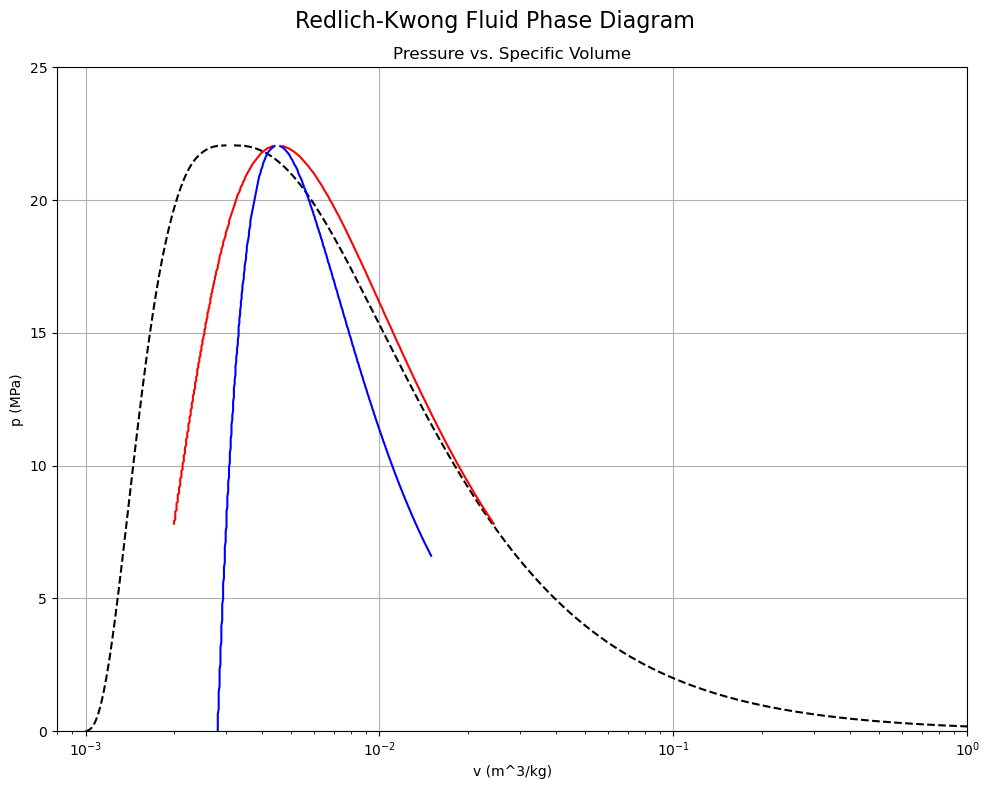

In [53]:
# This script calculates and plots the van der Waals isotherms,
# the spinodal curve (limits of stability), and the saturation curve (liquid-vapor equilibrium)
# on a single pressure-volume diagram.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# --- 1. Define Constants and Parameters ---
Tc_K = 647.096
pc_Pa = 22.060e6

# Van der Waals parameters for a water-like substance
R_JperKgPerK = 461.5
a = 0.42748 * ((R_JperKgPerK**2) * (Tc_K**2.5)) / pc_Pa
b = 0.08664 * (R_JperKgPerK * Tc_K) / pc_Pa

# --- 2. Define Isotherms to Plot ---
# We will use several fractions of the critical temperature (F)
# to plot isotherms both below and above the critical temperature.
F_values = np.linspace(0.7,1.1,500)#[0.9, 0.925, 0.95, 0.975, 1.0, 1.025]

# number of specific volume data points
v_max = 50000

# Set up the figure and subplot
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Redlich-Kwong Fluid Phase Diagram', fontsize=16)

# Lists to store saturation and spinodal points for plotting
p_saturation = []
v_liquid_sat = []
v_gas_sat = []
p_spinodal_liquid = []
p_spinodal_vapor = []
v_spinodal_liquid = []
v_spinodal_vapor = []

# --- 3. Loop through Isotherms and Plot ---
for F in F_values:
    T = F * Tc_K

    # Calculate Pressure-Volume Curve
    v__ = np.linspace(0.002, 1, v_max)
    p__ = ((R_JperKgPerK * T) / (v__ - b)) - a / ((T**0.5) * v__ * (v__ + b))

    # Plot on the axes (Pressure vs. Specific Volume)
    label = f'T/Tc = {F:.3f}'
#    ax.plot(v__, p__ / 1e6, label=label)

    if F < 1.0:
        # --- 4. Find Saturation Points (Phase Equilibrium) ---
        # The saturation points are where the chemical potentials of the
        # liquid and vapor phases are equal. This is a robust numerical approach.
        dp = np.diff(p__)
        v_mid = (v__[:-1] + v__[1:]) / 2
        mu_change = np.cumsum(v_mid * dp)
        mu_change = np.insert(mu_change, 0, 0)

        # Find the indices of the local maximum and minimum of the pressure-volume curve.
        p_diff = np.diff(p__)
        p_sign_change = np.where(np.diff(np.sign(p_diff)))[0]

        if len(p_sign_change) >= 2:
            unstable_start_idx = p_sign_change[0]
            unstable_end_idx = p_sign_change[1]

            p_liquid_branch = p__[:unstable_start_idx + 1]
            mu_liquid_branch = mu_change[:unstable_start_idx + 1]
            p_vapor_branch = p__[unstable_end_idx:]
            mu_vapor_branch = mu_change[unstable_end_idx:]

            mu_liquid_func = interp1d(p_liquid_branch, mu_liquid_branch)
            mu_vapor_func = interp1d(p_vapor_branch, mu_vapor_branch)

            def mu_diff_func(p):
                return mu_liquid_func(p) - mu_vapor_func(p)

            p_min_overlap = max(p_liquid_branch.min(), p_vapor_branch.min())
            p_max_overlap = min(p_liquid_branch.max(), p_vapor_branch.max())

            if p_min_overlap < p_max_overlap:
                try:
                    p_eq = brentq(mu_diff_func, p_min_overlap, p_max_overlap)

                    liquid_idx = np.argmin(np.abs(p_liquid_branch - p_eq))
                    vapor_idx = np.argmin(np.abs(p_vapor_branch - p_eq)) + unstable_end_idx

                    v_liquid = v__[liquid_idx]
                    v_gas = v__[vapor_idx]

                    p_saturation.append(p_eq / 1e6)
                    v_liquid_sat.append(v_liquid)
                    v_gas_sat.append(v_gas)

                except ValueError:
                    pass

        # --- 5. Find Spinodal Points ---
        # The spinodal points are where dp/dv = 0, marking the local max and min pressures.
        if len(p_sign_change) >= 2:
            spinodal_liquid_idx = p_sign_change[0]
            v_liquid_spinodal = v__[spinodal_liquid_idx]
            p_liquid_spinodal = p__[spinodal_liquid_idx]

            spinodal_vapor_idx = p_sign_change[1]
            v_vapor_spinodal = v__[spinodal_vapor_idx]
            p_vapor_spinodal = p__[spinodal_vapor_idx]

            p_spinodal_liquid.append(p_liquid_spinodal / 1e6)
            p_spinodal_vapor.append(p_vapor_spinodal / 1e6)
            v_spinodal_liquid.append(v_liquid_spinodal)
            v_spinodal_vapor.append(v_vapor_spinodal)

P = np.linspace(700/1e6, 22.063, 1000) # range of pressures
vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

ax.plot(vvap, P, 'k--')
ax.plot(vliq, P, 'k--')


# --- 6. Finalize Plot ---
# Plot the saturation curve
ax.plot(v_liquid_sat, p_saturation, 'r-', label='Saturation Points')
ax.plot(v_gas_sat, p_saturation, 'r-')

# Plot the spinodal curve
ax.plot(v_spinodal_liquid, p_spinodal_liquid, 'b-', label='Spinodal Curve')
ax.plot(v_spinodal_vapor, p_spinodal_vapor, 'b-')

ax.set_xlim([0.8e-3, 1])
ax.set_ylim([0, 25])
ax.set_xlabel('v (m^3/kg)')
ax.set_ylabel('p (MPa)')
ax.set_title('Pressure vs. Specific Volume')
ax.grid(True)
ax.set_xscale('log')
#ax.legend()

plt.tight_layout()

plt.savefig('redlich-kwong-p-v_spinodal_saturation_pycalor-diagram-subcritical.pdf')

plt.show()
